In [1]:
from __future__ import division, print_function
%matplotlib inline

In [3]:
import skimage

## 이미지는 넘파이 배열이다.



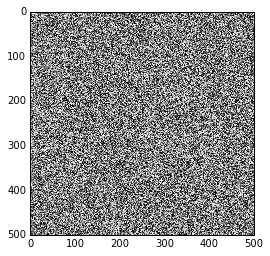

In [4]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([500, 500])

plt.imshow(random_image, cmap='gray', interpolation='nearest');

<type 'numpy.ndarray'> uint8 (303L, 384L)


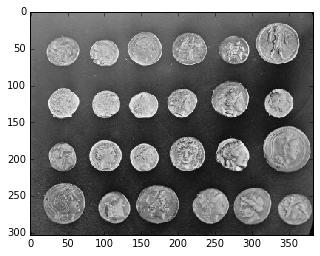

In [5]:
from skimage import data

coins = data.coins()

print(type(coins), coins.dtype, coins.shape)
plt.imshow(coins, cmap='gray', interpolation='nearest');

Shape: (300L, 451L, 3L)
Values min/max: 0 231


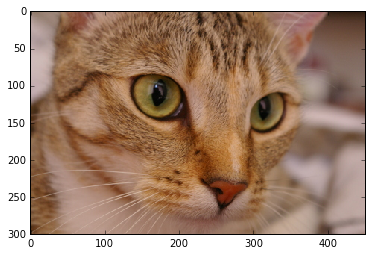

In [7]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat, interpolation='nearest');

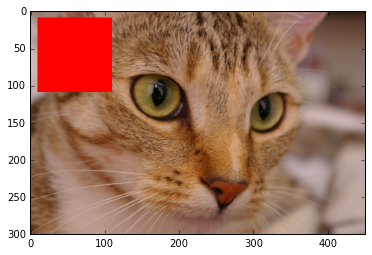

In [8]:
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


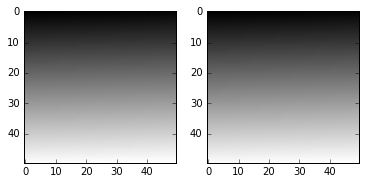

In [9]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

In [10]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_float = img_as_float(image)
image_ubyte = img_as_ubyte(image)

print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())

print("231/255 =", 231/255.)

type, min, max: float64 0.0 0.905882352941
type, min, max: uint8 0 231
231/255 = 0.905882352941


In [11]:
from skimage import data

image = data.camera()

In [14]:
import matplotlib.pyplot as plt
import numpy as np

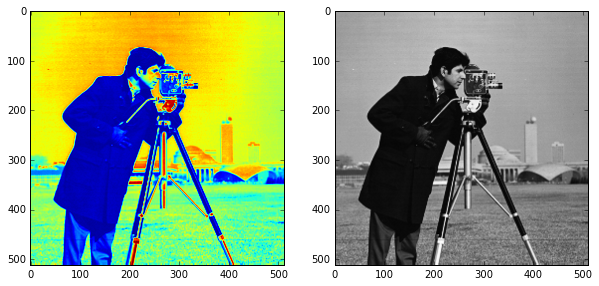

In [13]:
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize=(10, 5))

ax_jet.imshow(image, cmap='jet')
ax_gray.imshow(image, cmap='gray');

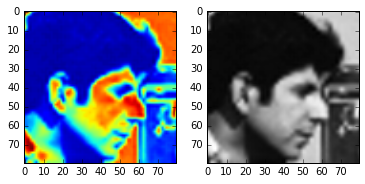

In [15]:
face = image[80:160, 200:280]
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2)
ax_jet.imshow(face, cmap='jet')
ax_gray.imshow(face, cmap='gray');

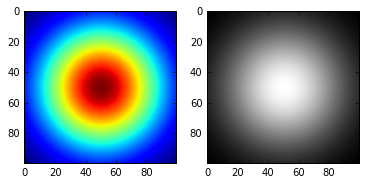

In [16]:
X, Y = np.ogrid[-5:5:0.1, -5:5:0.1]
R = np.exp(-(X**2 + Y**2) / 15)

fig, (ax_jet, ax_gray) = plt.subplots(1, 2)
ax_jet.imshow(R, cmap='jet')
ax_gray.imshow(R, cmap='gray');

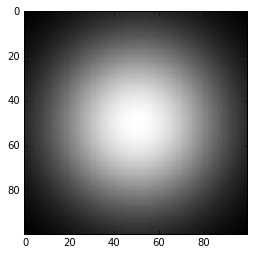

In [17]:
plt.imshow(R, cmap='gray', interpolation='nearest');

In [18]:
plt.rcParams['image.cmap'] = 'gray'

In [19]:
plt.rcParams['image.interpolation'] = 'nearest'

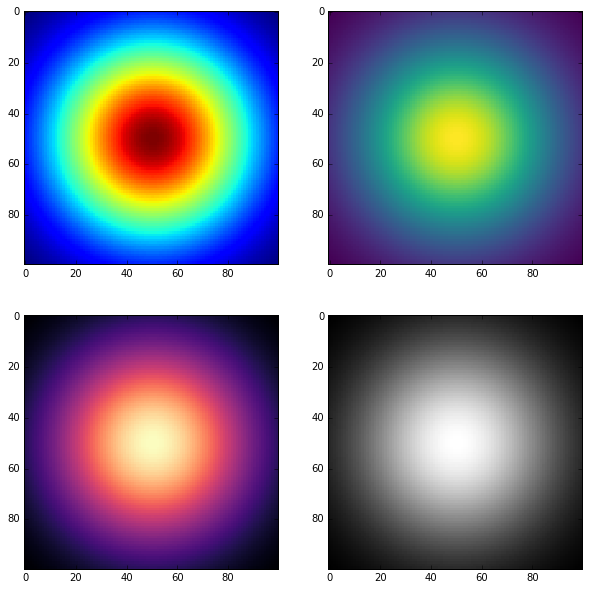

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(R, cmap='jet')
axes[0, 1].imshow(R, cmap='viridis')
axes[1, 0].imshow(R, cmap='magma')
axes[1, 1].imshow(R, cmap='gray');

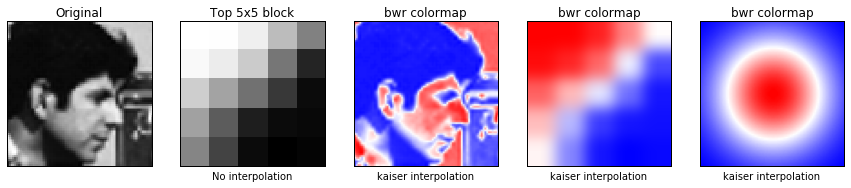

In [21]:
from IPython.html.widgets import interact, fixed
from matplotlib import cm as colormaps
import matplotlib.colors
import inspect

@interact(image=fixed(face),
          cmap=sorted([c for c in dir(colormaps)
                       if not c.endswith('_r') and
                          isinstance(getattr(colormaps, c),
                                     matplotlib.colors.Colormap)],
                      key=lambda x: x.lower()),
          reverse_cmap=False,
          interpolation=['nearest', 'bilinear', 'bicubic',
                         'spline16', 'spline36', 'hanning', 'hamming',
                         'hermite', 'kaiser', 'quadric', 'catrom',
                         'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'])
def imshow_params(image, cmap='jet', reverse_cmap=False, interpolation='bicubic'):
    fig, axes = plt.subplots(1, 5, figsize=(15, 4))
    
    if reverse_cmap:
        cmap = cmap + '_r'
    
    axes[0].imshow(image, cmap='gray', interpolation='nearest')
    axes[0].set_title('Original')
    
    axes[1].imshow(image[:5, :5], cmap='gray', interpolation='nearest')
    axes[1].set_title('Top 5x5 block')
    axes[1].set_xlabel('No interpolation')

    axes[2].imshow(image, cmap=cmap, interpolation=interpolation)
    axes[2].set_title('%s colormap' % cmap)
    axes[2].set_xlabel('%s interpolation' % interpolation)
    
    axes[3].imshow(image[:5, :5], cmap=cmap, interpolation=interpolation)
    axes[3].set_title('%s colormap' % cmap)
    axes[3].set_xlabel('%s interpolation' % interpolation)
    
    axes[4].imshow(R, cmap=cmap, interpolation=interpolation)
    axes[4].set_title('%s colormap' % cmap)
    axes[4].set_xlabel('%s interpolation' % interpolation)
    
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

<type 'numpy.ndarray'>


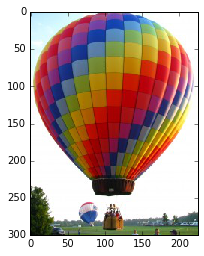

In [29]:
from skimage import io

image = io.imread('fig/balloon.jpg')

print(type(image))
plt.imshow(image);


In [30]:
ic = io.imread_collection('fig/*.png')

print(type(ic), '\n\n', ic)

<class 'skimage.io.collection.ImageCollection'> 

 ['fig\\bw-single-dot.png', 'fig\\color-16-dot.png', 'fig\\color-256-dot2.png', 'fig\\color-256-dot.png', 'fig\\cv-img-download.png', 'fig\\cv-workflow.png', 'fig\\haar-face-detection.png', 'fig\\how-many-books-ex01.png', 'fig\\how-many-books-ex02.png', 'fig\\image-addition-alpha.png', 'fig\\image-addition.png', 'fig\\imagenet-download.png', 'fig\\imagenet-one-conversion.png', 'fig\\lena-info-bgr2rgb.png', 'fig\\matplotlib-viewer.png', 'fig\\pil-numpy-workflow.png', 'fig\\python-cv-toolchain.png', 'fig\\raspberry-pi-logo.png', 'fig\\save-img.png']


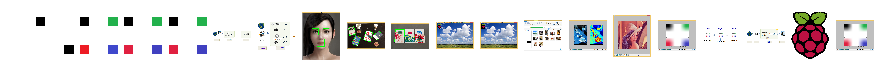

In [31]:
f, axes = plt.subplots(nrows=1, ncols=len(ic), figsize=(15, 10))

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

In [32]:
def draw_H(image, coords, color=(0.8, 0.8, 0.8), in_place=True):
    out = image.copy()
    # your code goes here
    return out

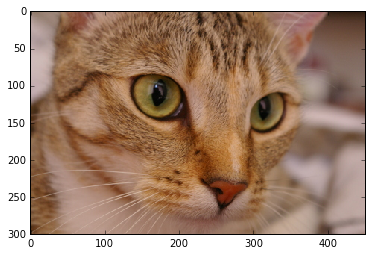

In [33]:
cat = data.chelsea()
cat_H = draw_H(cat, (50, -50))
plt.imshow(cat_H);